In [ ]:
# Importing necessary libraries 
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt 
import math
import imutils

from PIL import Image
from numpy import asarray
from sklearn.cluster import DBSCAN
from matplotlib.pyplot import figure

% matplotlib inline

In [ ]:
# Unzipping folder with images 
!unzip  /content/Image -d /content/Image

Archive:  /content/Image.zip
   creating: /content/Image/Image/
  inflating: /content/Image/Image/5121.jpg  
   creating: /content/Image/__MACOSX/
   creating: /content/Image/__MACOSX/Image/
  inflating: /content/Image/__MACOSX/Image/._5121.jpg  
  inflating: /content/Image/Image/7681.jpg  
  inflating: /content/Image/__MACOSX/Image/._7681.jpg  
  inflating: /content/Image/Image/7682.jpg  
  inflating: /content/Image/__MACOSX/Image/._7682.jpg  
  inflating: /content/Image/Image/7683.jpg  
  inflating: /content/Image/__MACOSX/Image/._7683.jpg  
  inflating: /content/Image/Image/2476.jpg  
  inflating: /content/Image/__MACOSX/Image/._2476.jpg  
  inflating: /content/Image/Image/.DS_Store  
  inflating: /content/Image/__MACOSX/Image/._.DS_Store  
  inflating: /content/Image/Image/7687.jpg  
  inflating: /content/Image/__MACOSX/Image/._7687.jpg  
  inflating: /content/Image/Image/7692.jpg  
  inflating: /content/Image/__MACOSX/Image/._7692.jpg  
  inflating: /content/Image/Image/7686.jpg  

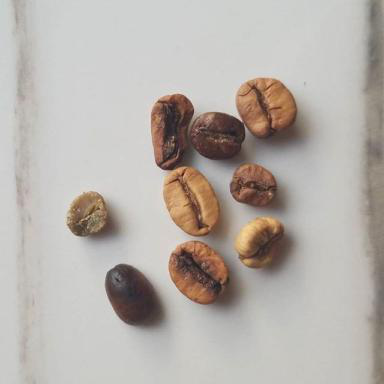

In [ ]:
path = '/content/Image/Image/5121.jpg'
image = Image.open(path)
image

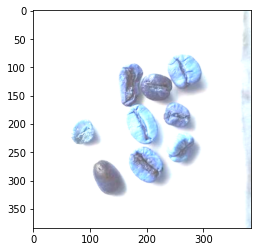

In [ ]:
## Load Image
img = cv2.imread(path) 
## Boost contrast
out = cv2.addWeighted(img, 1.5, img, 0, 50) # Call addWeighted function -> use beta = 0 to effectively only operate on one image
plt.imshow(out)

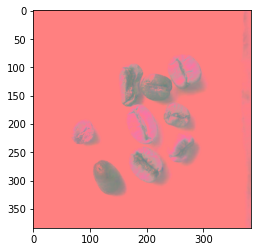

In [ ]:
labimg = cv2.cvtColor(out, cv2.COLOR_BGR2LAB)
plt.imshow(labimg)

(-0.5, 95.5, 95.5, -0.5)

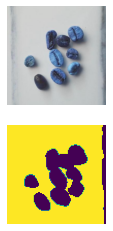

In [ ]:
## Down sample
n = 0
while(n<2):
    labimg = cv2.pyrDown(labimg)
    n = n+1

## Reshape from 3d to 2d
feature_image = np.reshape(labimg, [-1, 3])
rows, cols, chs = labimg.shape
# rows, cols = labimg.shape

## DBSCAN
db = DBSCAN(eps=1.5, min_samples=200, metric = 'euclidean',algorithm ='auto') # EPS to be adjusted based on image
db.fit(feature_image)
labels = db.labels_

indices = np.dstack(np.indices(labimg.shape[:2]))
xycolors = np.concatenate((labimg, indices), axis = -1) 
feature_image2 = np.reshape(xycolors, [-1,5])
db.fit(feature_image2)
labels2 = db.labels_

img_dbscan = Image.fromarray(np.reshape(labels, [rows, cols]).astype(np.uint8), mode = "P")

## DBSCAN PLOTTING
plt.figure(1)
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [rows, cols]))
plt.axis('off')

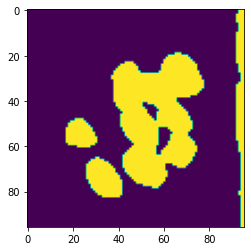

In [ ]:
blur= cv2.medianBlur(np.array(img_dbscan), 3) # smooth image by 7x7 pixels, may need to adjust a bit
plt.imshow(blur)

_,thresh = cv2.threshold(np.array(blur), np.mean(np.array(blur)), 255, cv2.THRESH_BINARY_INV)
edges = cv2.Canny(thresh,0,255)

(-0.5, 95.5, 95.5, -0.5)

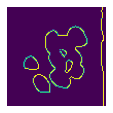

In [ ]:
plt.figure(1)
plt.subplot(2, 1, 1)
plt.imshow(edges)
plt.axis('off')

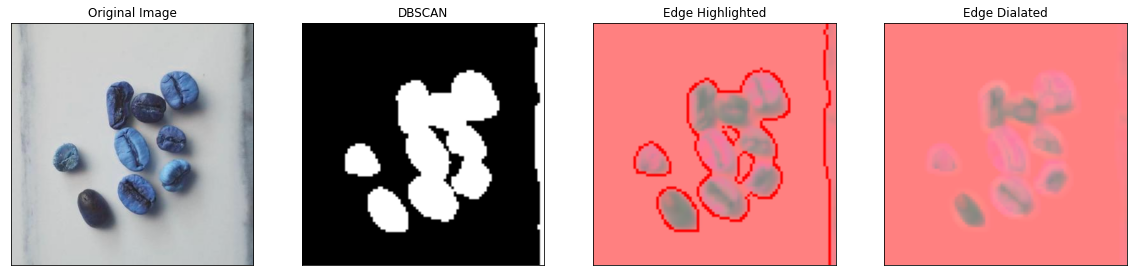

In [ ]:

img2 = labimg.copy()
img2[edges == 255] = [255, 0, 0]  # turn edges to red

kernel = np.ones((3,3), np.uint8)
img_dilation = cv2.dilate(img2, kernel, iterations=1)

figure(figsize=(20, 20))
plt.subplot(141),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(img_dbscan)
plt.title('DBSCAN'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img2)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(img_dilation)
plt.title('Edge Dialated'), plt.xticks([]), plt.yticks([])

plt.show()

Count of primary objects in the image :  9


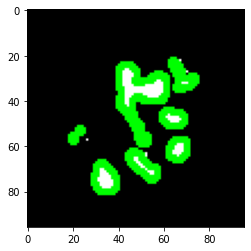

In [ ]:
(cnt, hierarchy) = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rgb = cv2.cvtColor(np.array(img_dbscan), cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)
print("Count of primary objects in the image : ", len(cnt))